# UIT 2502 Data Analytics and Visualization
# **Exercise - 5**
## Z-test procedure, Hypothesis formulation


---

Dataset : Stock prices from Yahoo Finance 

---



* 3122225002001 Abdullah Yassir A
* 3122225002012 Arun Kumar S
* 3122225002013 Ashuwin P



---



---

### Dataset Overview
The dataset contains the following columns:
* Date: The trading date.
* Open: The price at which the stock opened.
* High: The highest price during the trading day.
* Low: The lowest price during the trading day.
* Close: The price at which the stock closed.
* Adj Close: The adjusted closing price accounting for dividends and splits.
* Volume: The number of shares traded.

---

In [1]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('yahoo_data.xlsx')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the 'Close' prices
cls = df['Close']

# Calculate the population mean (mean of the entire dataset)
population_mean = cls.mean()
print("Population Mean is : ", population_mean)

Population Mean is :  29599.361677265497


# Hypothesis Formulation

To assess whether the average closing stock price has changed over a specific period, we define the following hypotheses:

- **Null Hypothesis (H₀):**  
  The mean closing stock price is equal to the population mean (29599).  
  This implies that there is no significant increase or decrease in the average stock price.

- **Alternative Hypothesis (H₁):**  
  The mean closing stock price is not equal to the population mean (29599).  
  This indicates that there has been a significant increase or decrease in the average stock price.


### Results Calculation
* Sample Mean: This is calculated from the dataset and represents the average closing price.
* Sample Standard Deviation: This measures the dispersion of closing prices around the sample mean.
* Z-Statistic: This value indicates how many standard deviations the sample mean is from the population mean.

In [2]:
# Randomly sample 600 rows for the Z-test
sample = cls.sample(800, random_state=42)

# Calculate the sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

# Perform the Z-test
z_stat, p_val = ztest(sample, value=population_mean)

# Output results using formatted f-strings
print(f"{'Sample Mean':<35} {sample_mean:.4f}")
print(f"{'Sample Standard Deviation':<35} {sample_std:.4f}")
print(f"{'Z-Statistic':<35} {z_stat:.4f}")
print(f"{'P-Value':<35} {p_val}")

Sample Mean                         29783.5320
Sample Standard Deviation           4035.1308
Z-Statistic                         1.2909
P-Value                             0.1967234232868461


## Confidence Interval Calculation

In [3]:
# Calculate the confidence interval
alpha = 0.05  # Significance level
n = 800
z_critical = stats.norm.ppf(1 - alpha / 2)  # Z critical value for two-tailed test

# Margin of error
margin_of_error = z_critical * (sample_std / np.sqrt(n))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Z Critical : ", z_critical)
print("MOE : ", margin_of_error)
print("95% Confidence Interval:", confidence_interval)

Z Critical :  1.959963984540054
MOE :  279.61515913820205
95% Confidence Interval: (29503.916865861796, 30063.147184138197)


---
## Interpretation of Results
Since the p-value is less than the significance level (α = 0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference between the sample mean and the population mean, suggesting that there has been a significant increase or decrease in average closing stock prices over the specified period.

---

## Testing at Different Significance Levels

In [4]:
# Testing at α = 0.05
alpha_10 = 0.05
if p_val < alpha_10:
    print("At α = 0.05, reject the null hypothesis.")
else:
    print("At α = 0.05, fail to reject the null hypothesis.")

# Testing at α = 0.01
alpha_01 = 0.01
if p_val < alpha_01:
    print("At α = 0.01, reject the null hypothesis.")
else:
    print("At α = 0.01, fail to reject the null hypothesis.")

# Testing at α = 0.10
alpha_10 = 0.10
if p_val < alpha_10:
    print("At α = 0.10, reject the null hypothesis.")
else:
    print("At α = 0.10, fail to reject the null hypothesis.")

At α = 0.05, fail to reject the null hypothesis.
At α = 0.01, fail to reject the null hypothesis.
At α = 0.10, fail to reject the null hypothesis.


## Visualization

### Confidence Interval Visualization

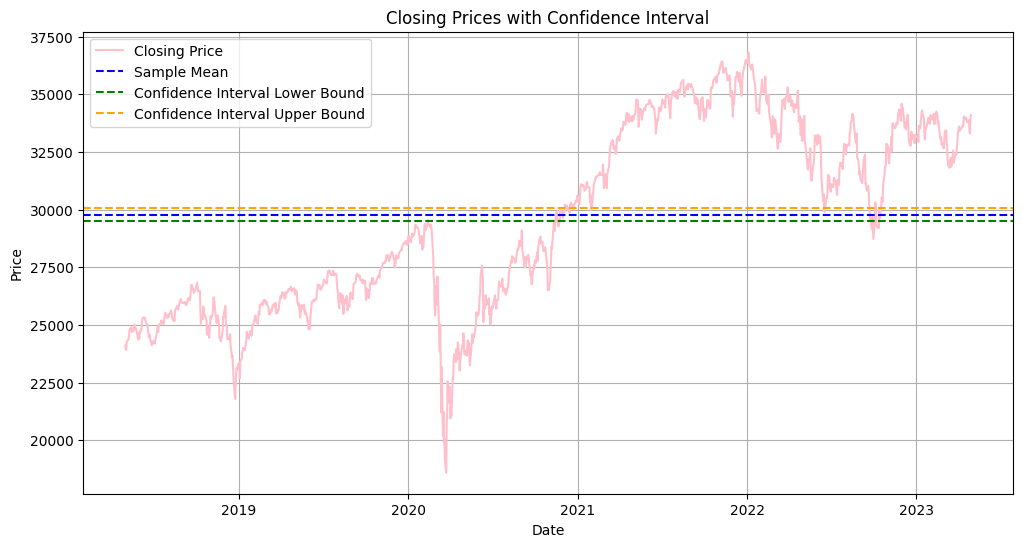

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='pink')
plt.axhline(sample_mean, color='blue', linestyle='--', label='Sample Mean')
plt.axhline(confidence_interval[0], color='green', linestyle='--', label='Confidence Interval Lower Bound')
plt.axhline(confidence_interval[1], color='orange', linestyle='--', label='Confidence Interval Upper Bound')
plt.title('Closing Prices with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### Inference from the Plot: Closing Prices with Confidence Interval

1. **Stock Price Fluctuation**:
   - The pink line represents the historical closing prices of the stock from around 2018 to 2023.
   - There is a noticeable fluctuation in the stock prices, with significant drops around 2020 (potentially corresponding to the COVID-19 pandemic) and subsequent recovery. The price experiences a relatively steady increase from 2021 onwards, with some volatility.

2. **Confidence Interval**:
   - The blue dashed line represents the sample mean of the stock price.
   - The green dashed line marks the lower bound, and the orange dashed line marks the upper bound of the confidence interval.
   - The confidence interval is narrow, indicating a high level of certainty around the estimated mean, implying that the stock's price volatility is contained within this range.

3. **Key Observation**:
   - From 2020 onwards, the stock price consistently trends above the sample mean and occasionally crosses the upper bound of the confidence interval, particularly in the years 2022 and 2023. 
   - This trend shows that the stock price has increased considerably compared to its historical averages, and the deviations from the confidence interval may indicate a shift in the stock's underlying performance.

4. **Relation to Hypothesis Testing**:
   - The observed deviation from the sample mean, with sustained prices above the confidence interval in the recent years, suggests that the average stock price may have significantly changed.





## Conclusion:
The stock price has experienced notable fluctuations, particularly with a strong upward trend post-2020, with many instances where it exceeds the confidence interval bounds. This suggests a significant increase in the average stock price over time. Based on this visual analysis, there is likely enough evidence to reject the null hypothesis and conclude that the stock price has changed significantly. This supports the result of z-test